<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/projects/Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

This project includes visualisation of data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).

The dataset is read from here: 'https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv'

The data is visualised and analysed in the following ways:



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)

display(df.head())
display(df.info())

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


None

### 1.  A line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

The preparation of the data for the line plot includes the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [37]:
from datetime import datetime, timezone
df['date'] = pd.to_datetime(df.date)
#df.dtypes

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['month_name'] = df['date'].dt.strftime('%b')
#adding a separate column for month in string form i.e. May etc cause it'll be needed further down for the bar pivot into ex2.
df['day'] = df.date.dt.day
df

,date,value,year,month,month_name,day
0,2016-05-09,1201,2016,5,May,9
1,2016-05-10,2329,2016,5,May,10
2,2016-05-11,1716,2016,5,May,11
3,2016-05-12,10539,2016,5,May,12
4,2016-05-13,6933,2016,5,May,13
...,...,...,...,...,...,...
1299,2019-11-29,171584,2019,11,Nov,29
1300,2019-11-30,141161,2019,11,Nov,30
1301,2019-12-01,142918,2019,12,Dec,1
1302,2019-12-02,220144,2019,12,Dec,2


In [38]:
df = df.set_index('date')

upper = df['value'].quantile(0.975)
lower = df['value'].quantile(0.025)

# in_range = upper - lower
# print(in_range)
# upper_limit = (upper + 1.5 * in_range) 
# lower_limit = (lower - 1.5 * in_range) 
# print(upper_limit, lower_limit)
#N/A here because this targets the inside range in btwn top 2.5% and bottom 2.5%#

df_filtered = df[(df['value']<=upper) & (df['value']>=lower)]
display(df_filtered)


,value,year,month,month_name,day
date,,,,,
2016-05-19,19736,2016,5,May,19
2016-05-26,18060,2016,5,May,26
2016-05-27,19997,2016,5,May,27
2016-05-28,19044,2016,5,May,28
2016-05-29,20325,2016,5,May,29
...,...,...,...,...,...
2019-11-24,138875,2019,11,Nov,24
2019-11-29,171584,2019,11,Nov,29
2019-11-30,141161,2019,11,Nov,30


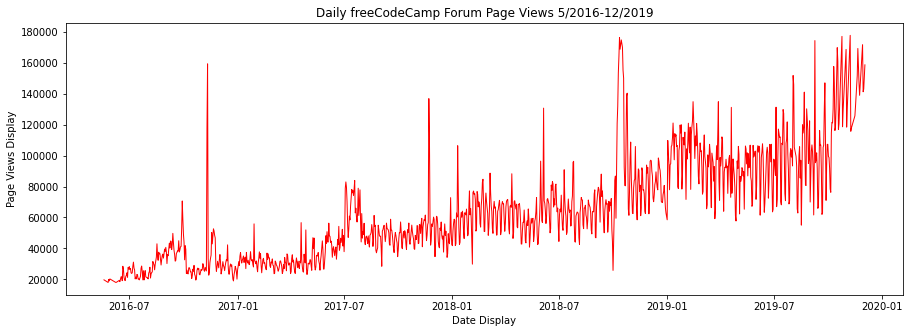

In [39]:
from datetime import datetime, timezone
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

def line_plot():
  df = pd.read_csv(url)
  df['date'] = pd.to_datetime(df.date)
  df['year'] = df.date.dt.year
  df['month'] = df.date.dt.month
  df['month_name'] = df['date'].dt.strftime('%b')
  df['day'] = df.date.dt.day
  df = df.set_index('date')

  upper = df['value'].quantile(0.975)
  lower = df['value'].quantile(0.025)
  df_filtered = df[(df['value']<=upper) & (df['value']>=lower)]

  fig, ax = plt.subplots(figsize = (15,5))
  ax.plot(df_filtered.index, df_filtered['value'], color= 'red', linewidth=1)
  ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  ax.set_xlabel('Date Display')
  ax.set_ylabel('Page Views Display')
  plt.show()

line_plot()

###2. A bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


month             1              2             3             4             5   \
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month            6             7              8             9              10  \
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

month             11      

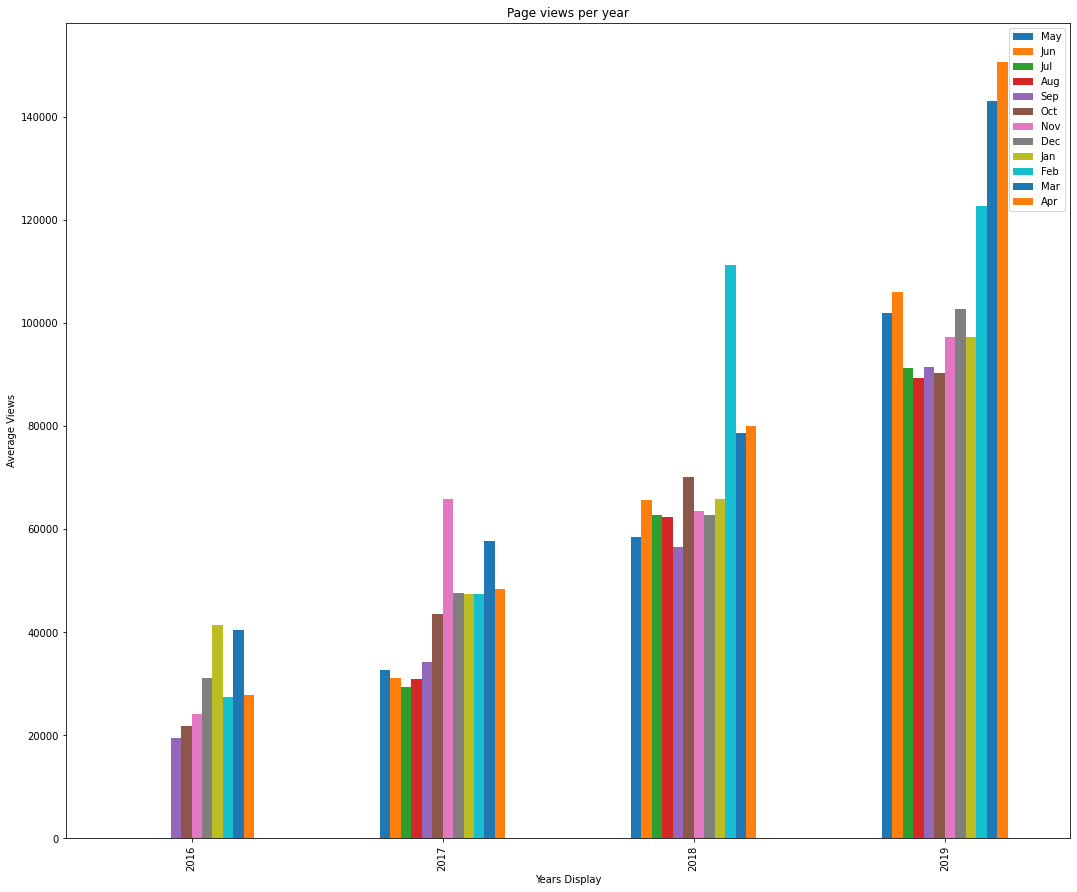

In [40]:
def bar_chart():

  df = pd.read_csv(url)
  df['date'] = pd.to_datetime(df.date)
  df['year'] = df.date.dt.year
  df['month'] = df.date.dt.month
  df['month_name'] = df['date'].dt.strftime('%b')
  df['day'] = df.date.dt.day
  df = df.set_index('date')

  upper = df['value'].quantile(0.975)
  lower = df['value'].quantile(0.025)
  df_filtered = df[(df['value']<=upper) & (df['value']>=lower)]

  table = pd.pivot_table(df_filtered, values = 'value', index = 'year', columns = 'month', aggfunc = np.mean)
  print(table)

  plt.rcParams["figure.figsize"] = [18, 15]
  labels=df_filtered['month_name'].unique()
  table.plot(kind='bar', xlabel = 'Years Display', ylabel = 'Average Views', title = 'Page views per year').legend(labels, bbox_to_anchor=(1, 1))

bar_chart()

###3.  A set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots show how the values are distributed within a given year or month and how it compares over time. 


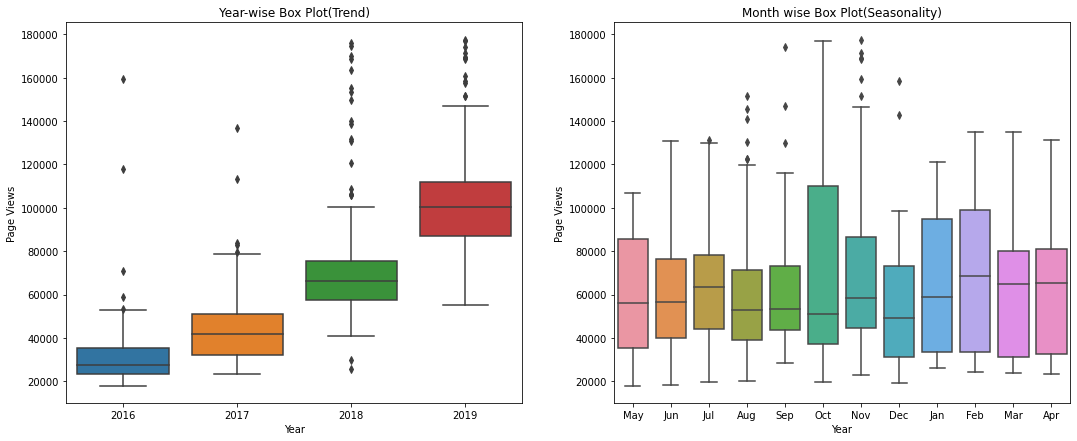

In [41]:
def box_plot():

  df = pd.read_csv(url)
  df['date'] = pd.to_datetime(df.date)
  df['year'] = df.date.dt.year
  df['month'] = df.date.dt.month
  df['month_name'] = df['date'].dt.strftime('%b')
  df['day'] = df.date.dt.day
  df = df.set_index('date')

  upper = df['value'].quantile(0.975)
  lower = df['value'].quantile(0.025)
  df_filtered = df[(df['value']<=upper) & (df['value']>=lower)]

  fig_dims = (18, 7)
  f, axes = plt.subplots(1, 2, figsize=fig_dims)
  boxplot1 = sns.boxplot(x= 'year', y='value', data=df_filtered, ax=axes[0]).set(xlabel = 'Year', ylabel='Page Views', title = 'Year-wise Box Plot(Trend)')
  boxplot2 = sns.boxplot(x= 'month_name', y='value', data=df_filtered, ax=axes[1]).set(xlabel = 'Year', ylabel='Page Views', title ='Month wise Box Plot(Seasonality)')

box_plot()

###4.  Predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


In [42]:
!pip install --upgrade openpyxl

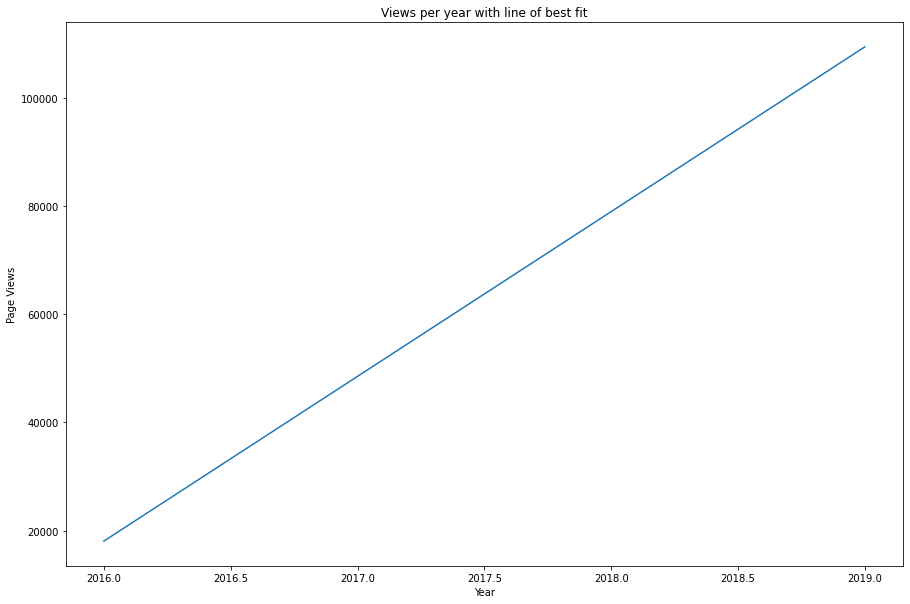

In [43]:
from scipy.stats import linregress

def linear_regression():

  df = pd.read_csv(url)
  df['date'] = pd.to_datetime(df.date)
  df['year'] = df.date.dt.year
  df['month'] = df.date.dt.month
  df['month_name'] = df['date'].dt.strftime('%b')
  df['day'] = df.date.dt.day
  df = df.set_index('date')

  upper = df['value'].quantile(0.975)
  lower = df['value'].quantile(0.025)
  df_filtered = df[(df['value']<=upper) & (df['value']>=lower)]
  x = df['year']
  y = df['value']
  regression = linregress(x,y)

  plt.rcParams["figure.figsize"] = [15, 10]
  plt.plot(x, regression.slope*x + regression.intercept)
  plt.title('Views per year with line of best fit')
  plt.xlabel('Year')
  plt.ylabel('Page Views')
  plt.show()

linear_regression()

In [64]:
#Predict the page views in the year 2020, 2025 and 2030 if identified trends persist.
# x = year
def views():
  x = df['year']
  y = df['value']
  regression = linregress(x,y)
  views = regression.slope * x + regression.intercept
  #views = slope * x + intercept
  #print(views)
  #return views

#Method 1:
  predict = views(2030)
  print(predict)

#Method 2:
  predict_2020 = predict_views(2020, regression)
  predict_2025 = predict_views(2025, regression)
  predict_2030 = predict_views(2030, regression)
  #For rounded decimals to 2 only:
  print("The predicted page views for the years 2020, 2025 and 2030 are: ",  
        ("{:.2f}".format(predict_2020)), 
        ("{:.2f}".format(predict_2025)), 
        ("{:.2f}".format(predict_2030))) 

#views()

In [56]:
#Method 3:
def page_views(year, slope, intercept):
  # y = mx + c
  page_views = slope*year + intercept
  return page_views
  prediction = page_views(2020, regression.slope, regression.intercept)
  print(prediction)

# Reflection

A very interesting project with many revision aspects and many new aspect involved. 

Steps in developing this project included:
- Use of Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
- Cleaning the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Creating a draw line plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
- Creating a draw bar plot function that draws a bar chart similar to "examples/Figure_2.png" showing average daily page views for each month grouped by year. The legend shows month labels. 
- Creating a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots show how the values are distributed within a given year or month and how it compares over time.

Some challenging parts were the plotting specifications, trying to adjust previous code from sample worksheets to new more complex exercises.